<h1>ML Regression (modified from previously completed Advance Data Science Capstone Project)</h1>

<h1>Vaccination against COVID vs. New Cases of COVID</h1>
<h2>(Machine Learning)</h2>

Here I am going to develop models of the progress of vaccination and full vaccination in the world. 

Here I am going to develop models of the progress of vaccination and full vaccination in the world. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#reading datasets which was created in the previous notebook
df_world1 = pd.read_csv("covid-data-world-vaccination.csv")
df_world2 = pd.read_csv("covid-data-world-full-vaccination.csv")
df_world3 = pd.read_csv("covid-data-world-revaccination.csv")
df_world1 = df_world1[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_world2 = df_world2[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_world3 = df_world3[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]

In [3]:
df_world1.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,World,2020-12-01,64019400.0,624844.0,1538676.0,12759.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
1,World,2020-12-02,64664686.0,645286.0,1551319.0,12643.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
2,World,2020-12-03,65357601.0,692915.0,1563919.0,12600.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
3,World,2020-12-04,66047271.0,689670.0,1576379.0,12460.0,1.0,1.0,0.0,0.0,0.0,7.874966e+09
4,World,2020-12-05,66694363.0,647092.0,1586717.0,10338.0,1.0,1.0,0.0,0.0,0.0,7.874966e+09


<h2>Feature Engineering</h2>

For machine training, dates need to be transformed into date_delta.

In [4]:
df_world1_ml = df_world1[['people_vaccinated','date']]
df_world1_ml['date_s'] = pd.to_datetime(df_world1_ml['date'])
df_world1_ml['date_delta'] = (df_world1_ml['date_s'] - df_world1_ml['date_s'].min())  / np.timedelta64(1,'D')
df_world1_ml.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,people_vaccinated,date,date_s,date_delta
477,5.055125e+09,2022-03-23,2022-03-23,477.0
478,5.059154e+09,2022-03-24,2022-03-24,478.0
479,5.061634e+09,2022-03-25,2022-03-25,479.0
480,5.065062e+09,2022-03-26,2022-03-26,480.0
481,5.067449e+09,2022-03-27,2022-03-27,481.0


In [5]:
df_world1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   people_vaccinated  482 non-null    float64       
 1   date               482 non-null    object        
 2   date_s             482 non-null    datetime64[ns]
 3   date_delta         482 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.2+ KB


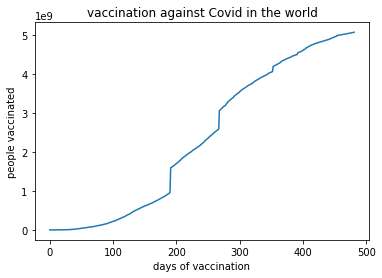

In [6]:
plt.plot(df_world1_ml['date_delta'], df_world1_ml['people_vaccinated'])
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")
plt.title("vaccination against Covid in the world")
plt.show()

In [7]:
df_world2_ml = df_world2[['people_fully_vaccinated','date']]
df_world2_ml['date_s'] = pd.to_datetime(df_world2_ml['date'])
df_world2_ml['date_delta'] = (df_world2_ml['date_s'] - df_world2_ml['date_s'].min())  / np.timedelta64(1,'D')
df_world2_ml.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,people_fully_vaccinated,date,date_s,date_delta
465,4.513876e+09,2022-03-23,2022-03-23,465.0
466,4.517634e+09,2022-03-24,2022-03-24,466.0
467,4.519827e+09,2022-03-25,2022-03-25,467.0
468,4.523293e+09,2022-03-26,2022-03-26,468.0
469,4.526680e+09,2022-03-27,2022-03-27,469.0


In [8]:
df_world2_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   people_fully_vaccinated  470 non-null    float64       
 1   date                     470 non-null    object        
 2   date_s                   470 non-null    datetime64[ns]
 3   date_delta               470 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.8+ KB


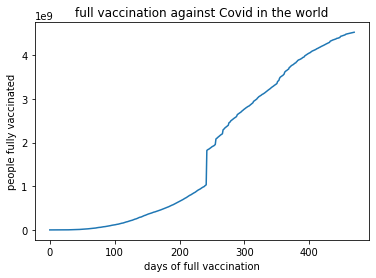

In [9]:
plt.plot(df_world2_ml['date_delta'], df_world2_ml['people_fully_vaccinated'])
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated")
plt.title("full vaccination against Covid in the world")
plt.show()

In [93]:
df_ml = df_world2_ml

<h2>Models of progress of vaccination (at least, one dose)</h2>

<h3>(Model definition, training, and evaluation)</h3>

<h3>1. Linear regression model</h3>

In [10]:
model_dataset1 = np.random.rand(len(df_world1_ml)) < 0.8
train1 = df_world1_ml[model_dataset1]
test1 = df_world1_ml[~model_dataset1]

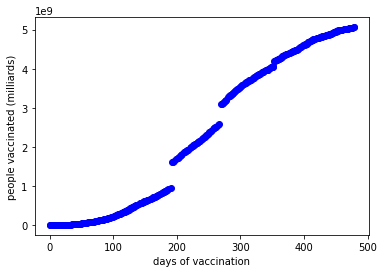

In [11]:
plt.scatter(train1.date_delta, train1.people_vaccinated, color='blue')
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated (milliards)")
plt.show()

In [12]:
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['date_delta']])
train_y1 = np.asanyarray(train1[['people_vaccinated']])
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[13329417.36888516]]
Intercept:  [-8.57489356e+08]


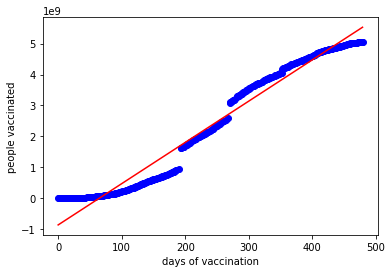

In [13]:
plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")
plt.show()

In [14]:
test_x1 = np.asanyarray(test1[['date_delta']])
test_y1 = np.asanyarray(test1[['people_vaccinated']])
test_y_1 = regr1.predict(test_x1)

metrics.r2_score(test_y1, test_y_1)

0.964510975691826

<h3>2. Polynomial regression models</h3>

<b>2.1. Quadratic model</b>

In [15]:
poly1_2 = PolynomialFeatures(degree=2)
train_x_poly1_2 = poly1_2.fit_transform(train_x1)

In [16]:
clf1_2 = linear_model.LinearRegression()
train_y_1_2 = clf1_2.fit(train_x_poly1_2, train_y1)
# The coefficients
print ('Coefficients: ', clf1_2.coef_)
print ('Intercept: ',clf1_2.intercept_)

Coefficients:  [[0.00000000e+00 1.11300037e+07 4.57032022e+03]]
Intercept:  [-6.81511676e+08]


Text(0, 0.5, 'people vaccinated')

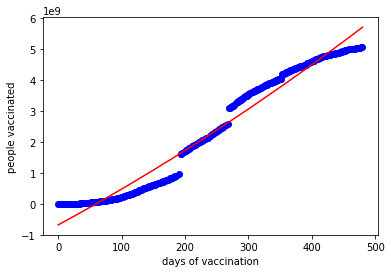

In [17]:
plt.scatter(train1.date_delta, train1.people_vaccinated, color='blue')
XX = np.arange(0.0, 480.0, 0.1)
yy = clf1_2.intercept_[0]+ clf1_2.coef_[0][1]*XX+ clf1_2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")

In [18]:
test_x_poly1_2 = poly1_2.fit_transform(test_x1)
test_y_1_2 = clf1_2.predict(test_x_poly1_2)

metrics.r2_score(test_y1, test_y_1_2)

0.9668208537381482

<b>2.2. Cubic model</b>

In [19]:
poly1_3 = PolynomialFeatures(degree=3)
train_x_poly1_3 = poly1_3.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00 -1.02724509e+07  1.15465570e+05 -1.53669706e+02]]
Intercept:  [1.88430646e+08]


0.9940951903527673

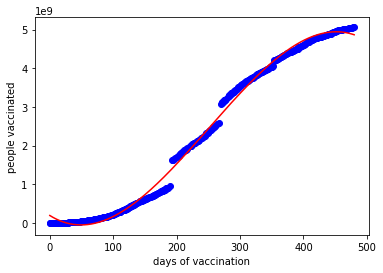

In [20]:
clf1_3 = linear_model.LinearRegression()
train_y_1_3 = clf1_3.fit(train_x_poly1_3, train_y1)
# The coefficients
print ('Coefficients: ', clf1_3.coef_)
print ('Intercept: ',clf1_3.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 480.0, 0.1)
yy = clf1_3.intercept_[0]+ clf1_3.coef_[0][1]*XX+ clf1_3.coef_[0][2]*np.power(XX, 2) + clf1_3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")

test_x_poly1_3 = poly1_3.fit_transform(test_x1)
test_y_1_3 = clf1_3.predict(test_x_poly1_3)

metrics.r2_score(test_y1, test_y_1_3)

<h3>2.3. Degree 4 polynomial regression</h3>

In [21]:
poly1_4 = PolynomialFeatures(degree=4)
train_x_poly1_4 = poly1_4.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00 -1.24879090e+07  1.36377166e+05 -2.21633392e+02
   7.08661973e-02]]
Intercept:  [2.41359253e+08]


0.9941763005488924

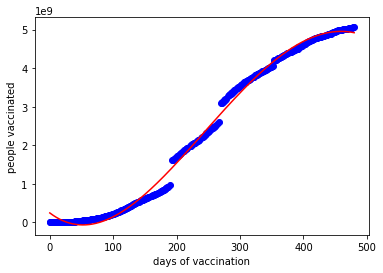

In [22]:
clf1_4 = linear_model.LinearRegression()
train_y_1_4 = clf1_4.fit(train_x_poly1_4, train_y1)
# The coefficients
print ('Coefficients: ', clf1_4.coef_)
print ('Intercept: ',clf1_4.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 480.0, 0.1)
yy = clf1_4.intercept_[0] + clf1_4.coef_[0][1]*XX + clf1_4.coef_[0][2]*np.power(XX, 2) + \
    clf1_4.coef_[0][3]*np.power(XX, 3) + clf1_4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")

test_x_poly1_4 = poly1_4.fit_transform(test_x1)
test_y_1_4 = clf1_4.predict(test_x_poly1_4)

metrics.r2_score(test_y1, test_y_1_4)

<h3>2.4. Degree 5 polynomial regression</h3>

In [23]:
poly1_5 = PolynomialFeatures(degree=5)
train_x_poly1_5 = poly1_5.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00  5.43876065e+06 -1.23901988e+05  1.21879232e+03
  -3.29558414e+00  2.79965252e-03]]
Intercept:  [-45334062.92726898]


0.9956378310440684

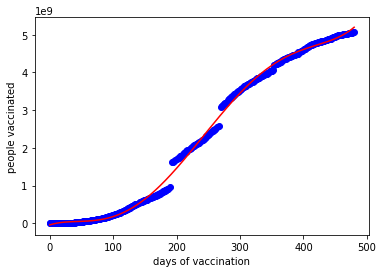

In [24]:
clf1_5 = linear_model.LinearRegression()
train_y_1_5 = clf1_5.fit(train_x_poly1_5, train_y1)
# The coefficients
print ('Coefficients: ', clf1_5.coef_)
print ('Intercept: ',clf1_5.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 480.0, 0.1)
yy = clf1_5.intercept_[0] + clf1_5.coef_[0][1]*XX + clf1_5.coef_[0][2]*np.power(XX, 2) + \
    clf1_5.coef_[0][3]*np.power(XX, 3) + clf1_5.coef_[0][4]*np.power(XX, 4) + clf1_5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")

test_x_poly1_5 = poly1_5.fit_transform(test_x1)
test_y_1_5 = clf1_5.predict(test_x_poly1_5)

metrics.r2_score(test_y1, test_y_1_5)

<h2>Models of progress of full vaccination</h2>

<h3>(Model definition, training, and evaluation)</h3>

<h3>1. Simple linear regression model</h3>

In [102]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [103]:
model_dataset = np.random.rand(len(df_ml)) < 0.8
train = df_ml[model_dataset]
test = df_ml[~model_dataset]

In [104]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['date_delta']])
train_y = np.asanyarray(train[['people_fully_vaccinated']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[11944588.7752136]]
Intercept:  [-1.00179379e+09]


In [105]:
test_x = np.asanyarray(test[['date_delta']])
test_y = np.asanyarray(test[['people_fully_vaccinated']])
test_y_ = regr.predict(test_x)

metrics.r2_score(test_y, test_y_)

0.9395020923756772

In [106]:
#mean_squared_error with squared=False returns RMSE 
#(root mean squared error)
mean_squared_error(test_y, test_y_, squared=False)

412677177.85102105

In [25]:
model_dataset2 = np.random.rand(len(df_world2_ml)) < 0.8
train2 = df_world2_ml[model_dataset2]
test2 = df_world2_ml[~model_dataset2]

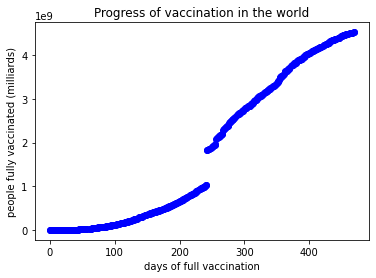

In [26]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated, color='blue')
plt.title("Progress of vaccination in the world")
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (milliards)")
plt.show()

In [27]:
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['date_delta']])
train_y2 = np.asanyarray(train2[['people_fully_vaccinated']])
regr2.fit (train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[11835949.44693088]]
Intercept:  [-9.66800227e+08]


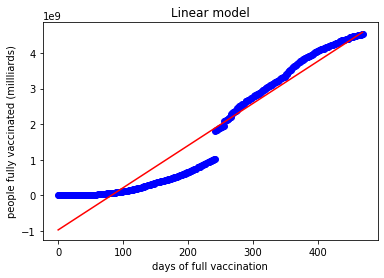

In [28]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.title("Linear model")
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (millliards)")
plt.show()

In [29]:
test_x2 = np.asanyarray(test2[['date_delta']])
test_y2 = np.asanyarray(test2[['people_fully_vaccinated']])
test_y_2 = regr2.predict(test_x2)

metrics.r2_score(test_y2, test_y_2)

0.9379616026439974

In [30]:
r2_score_linear = metrics.r2_score(test_y2, test_y_2)

<h3>2. Polynomial regression models</h3>

<b>2.1. Quadratic model</b>

<h2>2. Regression models with polynomial features</h2>

<h3>2.1. Model with 2nd degree polynomial</h3>

In [107]:
poly2 = PolynomialFeatures(degree=2)
train_x_poly2 = poly2.fit_transform(train_x)

In [108]:
model2 = linear_model.LinearRegression()
train_y_2 = model2.fit(train_x_poly2, train_y)
# The coefficients
print ('Coefficients: ', model2.coef_)
print ('Intercept: ', model2.intercept_)

Coefficients:  [[      0.         3394011.44276129   18201.35440881]]
Intercept:  [-3.26153974e+08]


In [110]:
test_x_poly2 = poly2.fit_transform(test_x)
test_y_2 = model2.predict(test_x_poly2)

metrics.r2_score(test_y, test_y_2)

0.9606546969370706

In [111]:
#mean_squared_error with squared=False returns RMSE 
#(root mean squared error)
mean_squared_error(test_y, test_y_2, squared=False)

332802608.87779015

<h3>2.2. Model with 5th degree polynomial</h3>

In [113]:
poly5 = PolynomialFeatures(degree=5)
train_x_poly5 = poly5.fit_transform(train_x)

In [114]:
model5 = linear_model.LinearRegression()
train_y_5 = model5.fit(train_x_poly5, train_y)
# The coefficients
print ('Coefficients: ', model5.coef_)
print ('Intercept: ', model5.intercept_)

Coefficients:  [[ 0.00000000e+00  1.56662262e+07 -2.75150072e+05  1.82370739e+03
  -4.24338880e+00  3.31082754e-03]]
Intercept:  [-1.8668068e+08]


In [115]:
test_x_poly5 = poly5.fit_transform(test_x)
test_y_5 = model5.predict(test_x_poly5)

metrics.r2_score(test_y, test_y_5)

0.9922301019754194

In [116]:
#mean_squared_error with squared=False returns RMSE 
#(root mean squared error)
mean_squared_error(test_y, test_y_5, squared=False)

147893107.43883035

<h3>2.3. Model with 10th degree polynomial</h3

In [117]:
poly10 = PolynomialFeatures(degree=10)
train_x_poly10 = poly10.fit_transform(train_x)

In [118]:
model10 = linear_model.LinearRegression()
train_y_10 = model10.fit(train_x_poly10, train_y)
# The coefficients
print ('Coefficients: ', model10.coef_)
print ('Intercept: ', model10.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.30706056e-07  7.43568540e-13  4.00875545e-11
   5.73625015e-09  6.42454858e-07  4.37536671e-05 -2.20197565e-07
   2.36511482e-10  3.46276319e-13 -5.75002281e-16]]
Intercept:  [49365275.17496228]


In [119]:
test_x_poly10 = poly10.fit_transform(test_x)
test_y_10 = model10.predict(test_x_poly10)

metrics.r2_score(test_y, test_y_10)

0.9935916344684672

In [120]:
#mean_squared_error with squared=False returns RMSE 
#(root mean squared error)
mean_squared_error(test_y, test_y_10, squared=False)

134311720.5770464

In [31]:
poly2_2 = PolynomialFeatures(degree=2)
train_x_poly2_2 = poly2_2.fit_transform(train_x2)

In [32]:
clf2_2 = linear_model.LinearRegression()
train_y_2_2 = clf2_2.fit(train_x_poly2_2, train_y2)
# The coefficients
print ('Coefficients: ', clf2_2.coef_)
print ('Intercept: ',clf2_2.intercept_)

Coefficients:  [[      0.         3728188.64950171   17331.29791999]]
Intercept:  [-3.35924329e+08]


Text(0, 0.5, 'people fully vaccinated (milliards)')

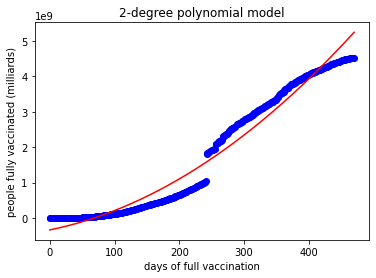

In [33]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 470.0, 0.1)
yy = clf2_2.intercept_[0]+ clf2_2.coef_[0][1]*XX+ clf2_2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.title("2-degree polynomial model")
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (milliards)")

In [34]:
test_x_poly2_2 = poly2_2.fit_transform(test_x2)
test_y_2_2 = clf2_2.predict(test_x_poly2_2)

metrics.r2_score(test_y2, test_y_2_2)

0.9670665742423123

In [35]:
r2_score_2_degree = metrics.r2_score(test_y2, test_y_2_2)

<b>2.2. Cubic model</b>

In [36]:
poly2_3 = PolynomialFeatures(degree=3)
train_x_poly2_3 = poly2_3.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00 -1.38949657e+07  1.11242640e+05 -1.33319295e+02]]
Intercept:  [3.47179231e+08]


0.9900135387548205

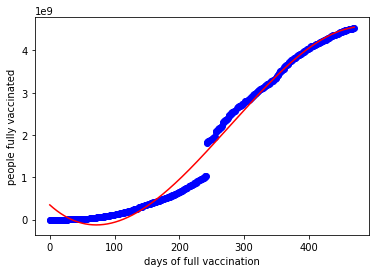

In [37]:
clf2_3 = linear_model.LinearRegression()
train_y_2_3 = clf2_3.fit(train_x_poly2_3, train_y2)
# The coefficients
print ('Coefficients: ', clf2_3.coef_)
print ('Intercept: ',clf2_3.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 470.0, 0.1)
yy = clf2_3.intercept_[0]+ clf2_3.coef_[0][1]*XX + clf2_3.coef_[0][2]*np.power(XX, 2) + clf2_3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated")

test_x_poly2_3 = poly2_3.fit_transform(test_x2)
test_y_2_3 = clf2_3.predict(test_x_poly2_3)

metrics.r2_score(test_y2, test_y_2_3)

<h3>2.3. Degree 4 polynomial regression</h3>

In [38]:
poly2_4 = PolynomialFeatures(degree=4)
train_x_poly2_4 = poly2_4.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00 -3.10033109e+06  7.22286869e+03  2.12554194e+02
  -3.69264756e-01]]
Intercept:  [97139255.80431199]


0.9919347057308225

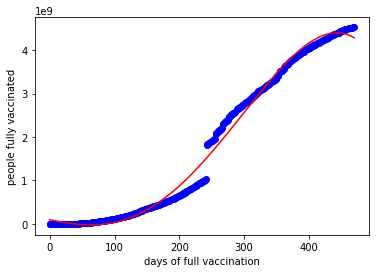

In [39]:
clf2_4 = linear_model.LinearRegression()
train_y_2_4 = clf2_4.fit(train_x_poly2_4, train_y2)
# The coefficients
print ('Coefficients: ', clf2_4.coef_)
print ('Intercept: ',clf2_4.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated, color='blue')
XX = np.arange(0.0, 470.0, 0.1)
yy = clf2_4.intercept_[0] + clf2_4.coef_[0][1]*XX + clf2_4.coef_[0][2]*np.power(XX, 2) + \
    clf2_4.coef_[0][3]*np.power(XX, 3) + clf2_4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated")

test_x_poly2_4 = poly2_4.fit_transform(test_x2)
test_y_2_4 = clf2_4.predict(test_x_poly2_4)

metrics.r2_score(test_y2, test_y_2_4)

<h3>2.4. Degree 5 polynomial regression</h3>

In [40]:
poly2_5 = PolynomialFeatures(degree=5)
train_x_poly2_5 = poly2_5.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00  1.50755904e+07 -2.67844027e+05  1.78778938e+03
  -4.16419577e+00  3.24575976e-03]]
Intercept:  [-1.78034801e+08]


0.9941983050500076

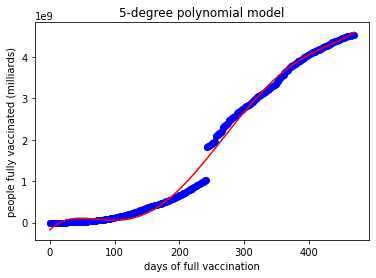

In [41]:
clf2_5 = linear_model.LinearRegression()
train_y_2_5 = clf2_5.fit(train_x_poly2_5, train_y2)
# The coefficients
print ('Coefficients: ', clf2_5.coef_)
print ('Intercept: ',clf2_5.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 470.0, 0.1)
yy = clf2_5.intercept_[0] + clf2_5.coef_[0][1]*XX + clf2_5.coef_[0][2]*np.power(XX, 2) + \
    clf2_5.coef_[0][3]*np.power(XX, 3) + clf2_5.coef_[0][4]*np.power(XX, 4) + clf2_5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.title("5-degree polynomial model")
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (milliards)")

test_x_poly2_5 = poly2_5.fit_transform(test_x2)
test_y_2_5 = clf2_5.predict(test_x_poly2_5)

metrics.r2_score(test_y2, test_y_2_5)

In [42]:
r2_score_5_degree = metrics.r2_score(test_y2, test_y_2_5)

In [144]:
import warnings
warnings.filterwarnings('ignore')

<h2>3. Regularization</h2>

In [145]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

<h3>3.1. Ridge regression</h3>

In [146]:
ridge = Ridge(alpha=80).fit(train_x_poly10, train_y)

In [147]:
test_y_ridge = ridge.predict(test_x_poly10)
print(r2_score(test_y, test_y_ridge))

0.9955601401464049


In [148]:
mean_squared_error(test_y, test_y_ridge, squared=False)

111795650.0316397

<h3>3.2. Lasso regression</h3>

In [154]:
lasso = Lasso(alpha=0.0005).fit(train_x_poly10, train_y)

In [155]:
test_y_lasso = lasso.predict(test_x_poly10)
print(r2_score(test_y, test_y_lasso))

0.9902882163970492


In [156]:
mean_squared_error(test_y, test_y_lasso, squared=False)

165344507.6045687

<h3>3.3. ElasticNet regression</h3>

In [157]:
elasticnet = ElasticNet(alpha=1e-05, l1_ratio=0.9).fit(train_x_poly10, train_y)

In [158]:
test_y_elasticnet = elasticnet.predict(test_x_poly10)
print(r2_score(test_y, test_y_elasticnet))

0.9902882164060266


In [159]:
mean_squared_error(test_y, test_y_elasticnet, squared=False)

165344507.52814832

<h2>3. Regularization</h2>

In [43]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

<h3>3.0. Degree 10 polynomial regression</h3>

Coefficients:  [[ 0.00000000e+00  1.23599946e-07 -1.28930603e-11  3.88615865e-11
   5.55870689e-09  6.22738929e-07  4.24357618e-05 -2.06585633e-07
   1.84897462e-10  4.31609260e-13 -6.26979823e-16]]
Intercept:  [48827017.95623326]


0.9951826169598792

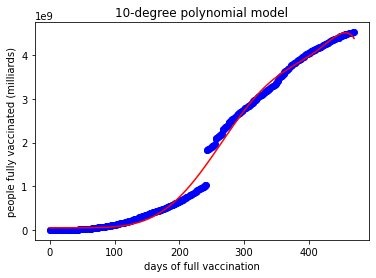

In [44]:
poly2_10 = PolynomialFeatures(degree=10)
train_x_poly2_10 = poly2_10.fit_transform(train_x2)
clf2_10 = linear_model.LinearRegression()
train_y_2_10 = clf2_10.fit(train_x_poly2_10, train_y2)
# The coefficients
print ('Coefficients: ', clf2_10.coef_)
print ('Intercept: ',clf2_10.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 470.0, 0.1)
yy = clf2_10.intercept_[0] + clf2_10.coef_[0][1]*XX + clf2_10.coef_[0][2]*np.power(XX, 2) + \
    clf2_10.coef_[0][3]*np.power(XX, 3) + clf2_10.coef_[0][4]*np.power(XX, 4) + \
    clf2_10.coef_[0][5]*np.power(XX, 5) + clf2_10.coef_[0][6]*np.power(XX, 6) + \
    clf2_10.coef_[0][7]*np.power(XX, 7) + clf2_10.coef_[0][8]*np.power(XX, 8) + \
    clf2_10.coef_[0][9]*np.power(XX, 9) + clf2_10.coef_[0][10]*np.power(XX, 10)
plt.plot(XX, yy, '-r' )
plt.title("10-degree polynomial model")
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (milliards)")

test_x_poly2_10 = poly2_10.fit_transform(test_x2)
test_y_2_10 = clf2_10.predict(test_x_poly2_10)

metrics.r2_score(test_y2, test_y_2_10)

In [45]:
r2_score_10_degree = metrics.r2_score(test_y2, test_y_2_10)

<h3>3.1. Ridge regularization</h3>

In [46]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [47]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(train_x_poly2_10, train_y2)

ridgeCV_rmse = rmse(test_y2, ridgeCV.predict(test_x_poly2_10))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 92892736.51358064


/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.3171e-57): result may not be accurate.
  overwrite_a=True).T
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31668e-57): result may not be accurate.
  overwrite_a=True).T
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29031e-57): result may not be accurate.
  overwrite_a=True).T
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.59107e-55): result may not be accurate.
  overwrite_a=True).T
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31336e-56): result may not be accurate.
  overwrite_a=True).T
/home/alexandr/.local/lib/

In [49]:
y_pred_ridge = ridgeCV.predict(test_x_poly2_10)
print(r2_score(test_y2, y_pred_ridge))

0.9969999142330616


In [50]:
r2_score_ridge = r2_score(test_y2, y_pred_ridge)

<h3>3.2. Lasso regularization</h3>

In [51]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e6,
                  cv=3).fit(train_x_poly2_10, train_y2)

lassoCV_rmse = rmse(test_y2, lassoCV.predict(test_x_poly2_10))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0307591313559526e+18, tolerance: 4.955647770288563e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9731936056862725e+18, tolerance: 4.955647770288563e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did n

0.0005 114762706.9955747


/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9775593912388337e+18, tolerance: 1.0535201825908427e+17
  positive)


In [53]:
y_pred_lasso = lassoCV.predict(test_x_poly2_10)
print(r2_score(test_y2, y_pred_lasso))

0.995420988605152


In [54]:
r2_score_lasso = r2_score(test_y2, y_pred_lasso)

<h3>3.3. ElasticNet regularization</h3>

In [55]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e6).fit(train_x_poly2_10, train_y2)
elasticNetCV_rmse = rmse(test_y2, elasticNetCV.predict(test_x_poly2_10))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9498141618500767e+18, tolerance: 7.480046304612226e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7322779001807647e+18, tolerance: 7.480046304612226e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did n

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.466862046711202e+18, tolerance: 8.370991781517312e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.492634124701296e+17, tolerance: 9.995555016568178e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.350682723172932e+17, tolerance: 9.995555016568178e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Conv

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3800517357816463e+18, tolerance: 8.805964316020717e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.963201279042925e+18, tolerance: 4.994556088864014e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9611916400112197e+18, tolerance: 4.994556088864014e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Co

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.598525536702921e+18, tolerance: 7.480046304612226e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5200698191199e+18, tolerance: 8.370991781517312e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.500393257326082e+18, tolerance: 8.370991781517312e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Conver

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1339879740496525e+17, tolerance: 9.995555016568178e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.830145418828688e+18, tolerance: 8.805964316020717e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6471508775079107e+18, tolerance: 8.805964316020717e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Co

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.957120034638984e+18, tolerance: 4.994556088864014e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9498393037125714e+18, tolerance: 7.480046304612226e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.732238514889453e+18, tolerance: 7.480046304612226e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Con

/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.46686315211654e+18, tolerance: 8.370991781517312e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.492614809080013e+17, tolerance: 9.995555016568178e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3506835512639546e+17, tolerance: 9.995555016568178e+16
  tol, rng, random, positive)
/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Conv

1e-05 0.9 121977783.31835766


/home/alexandr/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.358790216827815e+18, tolerance: 1.0535201825908427e+17
  positive)


In [57]:
y_pred_elasticNet = elasticNetCV.predict(test_x_poly2_10)
print(r2_score(test_y2, y_pred_elasticNet))

0.9948271292134738


In [58]:
r2_score_elasticNet = r2_score(test_y2, y_pred_elasticNet)

<h3>3.4. Summary</h3>

In [59]:
clf2_10_rmse = rmse(test_y2, clf2_10.predict(test_x_poly2_10))
regr2_rmse = rmse(test_y2, regr2.predict(test_x2))
clf2_2_rmse = rmse(test_y2, clf2_2.predict(test_x_poly2_2))
clf2_5_rmse = rmse(test_y2, clf2_5.predict(test_x_poly2_5))

In [60]:
r2_score_vals = [r2_score_linear, r2_score_2_degree, r2_score_5_degree, r2_score_10_degree, r2_score_ridge,
                r2_score_lasso, r2_score_elasticNet]

labels = ['Linear', '2-degree polynomial', '5-degree polynomial', '10-degree polynomial', 'Ridge', 'Lasso',
          'ElasticNet']

r2_score_df = pd.Series(r2_score_vals, index=labels).to_frame()
r2_score_df.rename(columns={0: 'r2_score'}, inplace=1)
r2_score_df

,r2_score
Linear,0.937962
2-degree polynomial,0.967067
5-degree polynomial,0.994198
10-degree polynomial,0.995183
Ridge,0.997000
Lasso,0.995421
ElasticNet,0.994827


In [61]:
rmse_vals = [regr2_rmse, clf2_2_rmse, clf2_5_rmse, clf2_10_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', '2-degree polynomial', '5-degree polynomial', '10-degree polynomial', 'Ridge', 'Lasso',
          'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,4.224207e+08
2-degree polynomial,3.077750e+08
5-degree polynomial,1.291791e+08
10-degree polynomial,1.177119e+08
Ridge,9.289274e+07
Lasso,1.147627e+08
ElasticNet,1.219778e+08


In [62]:
metrics_df = r2_score_df.join(rmse_df)
metrics_df

,r2_score,RMSE
Linear,0.937962,4.224207e+08
2-degree polynomial,0.967067,3.077750e+08
5-degree polynomial,0.994198,1.291791e+08
10-degree polynomial,0.995183,1.177119e+08
Ridge,0.997000,9.289274e+07
Lasso,0.995421,1.147627e+08
ElasticNet,0.994827,1.219778e+08


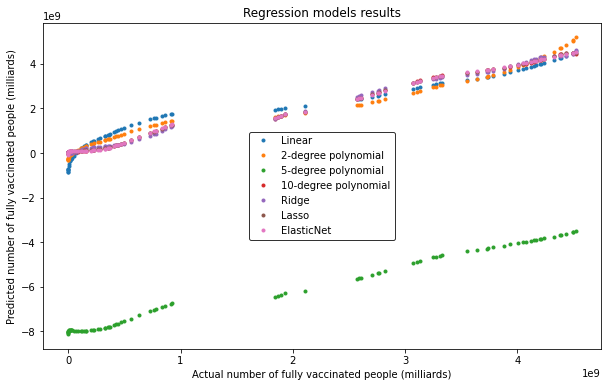

In [160]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(test_y2, regr2.predict(test_x2), 
             marker='o', ls='', ms=3.0, label='Linear')
ax.plot(test_y2, clf2_2.predict(test_x_poly2_2), 
             marker='o', ls='', ms=3.0, label='2-degree polynomial')
ax.plot(test_y2, clf2_5.predict(test_x_poly2_5), 
             marker='o', ls='', ms=3.0, label='5-degree polynomial')

labels = ['10-degree polynomial', 
          'Ridge', 'Lasso', 'ElasticNet']

models = [clf2_10, ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(test_y2, mod.predict(test_x_poly2_10), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual number of fully vaccinated people (milliards)', 
       ylabel='Predicted number of fully vaccinated people (milliards)', 
       title='Regression models results');

In [64]:
length = len(test_y_2)
actual_last = test_y2[length-1][0]
pred_last_linear = test_y_2[length-1][0]
pred_last_2_degree = test_y_2_2[length-1][0]
pred_last_5_degree = test_y_2_5[length-1][0]
pred_last_10_degree = test_y_2_10[length-1][0]
pred_last_ridge = y_pred_ridge[length-1][0]
pred_last_lasso = y_pred_lasso[length-1]
pred_last_elasticNet = y_pred_elasticNet[length-1]


In [66]:
last_vals = [actual_last, pred_last_linear, pred_last_2_degree, pred_last_5_degree, pred_last_10_degree, 
             pred_last_ridge, pred_last_lasso, pred_last_elasticNet]

labels = ['Actual', 'Linear', '2-degree polynomial', '5-degree polynomial', '10-degree polynomial', 'Ridge',
         'Lasso', 'ElasticNet']


last_df = pd.Series(last_vals, index=labels).to_frame()
last_df.rename(columns={0: 'values for the last day'}, inplace=1)
last_df

,values for the last day
Actual,4.519827e+09
Linear,4.560588e+09
2-degree polynomial,5.184905e+09
5-degree polynomial,4.563836e+09
10-degree polynomial,4.437980e+09
Ridge,4.612120e+09
Lasso,4.473864e+09
ElasticNet,4.519871e+09


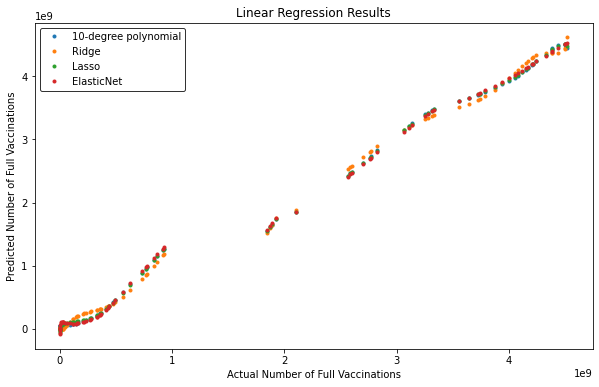

In [69]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

labels = ['10-degree polynomial', 
          'Ridge', 'Lasso', 'ElasticNet']

models = [clf2_10, ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(test_y2, mod.predict(test_x_poly2_10), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Number of Full Vaccinations', 
       ylabel='Predicted Number of Full Vaccinations', 
       title='Linear Regression Results');

<h2>Prognosis of completed vaccination</h2>

<h3>1. Completion of vaccination with, at least, one dose of vaccine</h3>

In [70]:
last_date = df_world1['date'].max()
df_date = df_world1['date']==last_date
df_last_date = df_world1[df_date]
last_date_index = df_last_date.index[0]
world_population = df_last_date.loc[last_date_index,'population']
print("World population: %.0f" % world_population)

World population: 7874965730


<b>1.1. Linear regression model</b>

In [71]:
#calculating when all the people will be vaccinated (according to the linear regression model)
x_1 = (world_population + regr1.intercept_[0])/regr1.coef_[0,0]
x_1_comp = x_1 - df_world1_ml['date_delta'].max()
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")

According to the linear model vaccination will be completed in 45 days


<b>1.2. Polynomial quadratic regression model</b>

In [72]:
#calculating when all the people will be vaccinated (according to the polynomial quadratic regression model)
a = clf1_2.coef_[0,2]
b = clf1_2.coef_[0,1]
c = clf1_2.intercept_[0] - world_population
from math import sqrt
D = b**2 - 4*a*c
x_1_1 = (-b + sqrt(D))/(2*a)
x_1_2 = (-b - sqrt(D))/(2*a)  #this root is negative, so we drop it
x_1_1_comp = x_1_1 - df_world1_ml['date_delta'].max()
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")

According to the quadratic model vaccination will be completed in 133 days


<b>1.3. Polynomial cubic regression model</b>

In [73]:
#calculations using cubic regression model
x_3 = clf1_3.coef_[0]
x_3[0] = clf1_3.intercept_[0] - world_population
x_3_tr = np.flip(x_3)
np.roots(x_3_tr)

array([ 474.24079314+169.94977819j,  474.24079314-169.94977819j,
       -197.09360831  +0.j        ])

The cubic model has only complex and negative roots, which means that according to this model, the whole population of the world will never be vaccinated. Let's find the maximum number of people that will be vaccinated.

In [74]:
x_3_dif = x_3_tr
x_3_dif[0] = 3*x_3_dif[0]
x_3_dif[1] = 2*x_3_dif[1]
x_3_diff = x_3_dif[:-1]
roots_3 = np.roots(x_3_diff)
roots_3

array([451.58205373,  49.34326492])

In [75]:
day_max1 = roots_3[0] - df_world1_ml['date_delta'].max()
print("Maximum will be reached in: %.0f" % x_1_comp, "days")
people_max1 = clf1_3.intercept_[0] + clf1_3.coef_[0][1]*roots_3[0] +\
clf1_3.coef_[0][2]*np.power(roots_3[0],2) + clf1_3.coef_[0][3]*np.power(roots_3[0],3)
print("Maximum of people who will be vaccinated: %.0f" % people_max1)
print("Percentage of the total population:", (people_max1/world_population)*100, "%")
print("Number of people already vaccinated: %.0f" % df_world1['people_vaccinated'].max())
print("Percentage of the total population:", (df_world1['people_vaccinated'].max()/world_population)*100, "%")

Maximum will be reached in: 45 days
Maximum of people who will be vaccinated: 188430646
Percentage of the total population: 2.392780517559247 %
Number of people already vaccinated: 5067448898
Percentage of the total population: 64.34883746471873 %


This result is obviously incorrect because the number of people who have been already vaccinated is higher than this model predicts. This means that the cubic regression model for vaccination progress cannot be used for prediction when the whole population of the world will be vaccinated or when the maximum number of people vaccinated will be reached.

<b>1.4. Polynomial 4-degree regression model</b>

In [76]:
#calculations using 4-degree model
x_4 = clf1_4.coef_[0]
x_4[0] = clf1_4.intercept_[0] - world_population
x_4_tr = np.flip(x_4)
np.roots(x_4_tr)

array([2348.24851001  +0.j        ,  477.22706718+184.56085876j,
        477.22706718-184.56085876j, -175.21167141  +0.j        ])

This model has only complex roots.

In [77]:
x_4_dif = x_4
x_4_dif[0] = 4*x_4_dif[0]
x_4_dif[1] = 3*x_4_dif[1]
x_4_dif[2] = 2*x_4_dif[2]
x_4_diff = x_4_dif[:-1]
roots_4 = np.roots(x_4_diff)
roots_4

array([-0.00395198,  0.00150326,  0.00122179])

All the extremums of this function were already reached. This means that this function cannot be used in order to prognose the progress of vaccination in future.

<b>1.5. Polynomial 5-degree regression model</b>

In [78]:
#calculations using 5-degree model
x_5 = clf1_5.coef_[0]
x_5[0] = clf1_5.intercept_[0] - world_population
x_5_tr = np.flip(x_5)
np.roots(x_5_tr)

array([554.53526447  +0.j        , 387.81007092+173.49685051j,
       387.81007092-173.49685051j, -76.5074927 +149.70231574j,
       -76.5074927 -149.70231574j])

In [79]:
roots_5 = np.roots(x_5_tr)
x_1_5_comp = np.real(roots_5[0]) - df_world1_ml['date_delta'].max()
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the 5-degree model vaccination will be completed in 74 days


<b>Conclusion</b>

In [80]:
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the linear model vaccination will be completed in 45 days
According to the quadratic model vaccination will be completed in 133 days
According to the 5-degree model vaccination will be completed in 74 days


Therefore, these three models give similar results.

<h3>2. Completion of full vaccination</h3>

<b>2.1. Linear regression model</b>

In [81]:
#calculating when all the people will be fully vaccinated (according to the linear regression model)
x_2 = (world_population + regr2.intercept_[0])/regr2.coef_[0,0]
x_2_comp = x_2 - df_world2_ml['date_delta'].max()
print("According to the linear model full vaccination will be completed in %.0f" % x_2_comp, "days")

According to the linear model full vaccination will be completed in 115 days


<b>2.2. Polynomial quadratic regression model</b>

In [82]:
#calculating when all the people will be vaccinated (according to the polynomial quadratic regression model)
a = clf2_2.coef_[0,2]
b = clf2_2.coef_[0,1]
c = clf2_2.intercept_[0] - world_population
from math import sqrt
D = b**2 - 4*a*c
x_2_1 = (-b + sqrt(D))/(2*a)
x_2_2 = (-b - sqrt(D))/(2*a) #this root is negative, so we drop it
x_2_1_comp = x_2_1 - df_world2_ml['date_delta'].max()
print("According to the quadratic model full vaccination will be completed in %.0f" % x_2_1_comp, "days")

According to the quadratic model full vaccination will be completed in 120 days


<b>2.3. Polynomial cubic regression model</b>

In [83]:
#calculations using cubic model
x_3_2 = clf2_3.coef_[0]
x_3_2[0] = clf2_3.intercept_[0] - world_population
x_3_2_tr = np.flip(x_3_2)
np.roots(x_3_2_tr)

array([ 511.90199885+189.95866307j,  511.90199885-189.95866307j,
       -189.39634371  +0.j        ])

The cubic model has only complex and negative roots, which means that according to this model, the whole population of the world will never be vaccinated. Let's find the maximum number of people that will be vaccinated.

In [84]:
x_3_2_dif = x_3_2_tr
x_3_2_dif[0] = 3*x_3_2_dif[0]
x_3_2_dif[1] = 2*x_3_2_dif[1]
x_3_2_diff = x_3_2_dif[:-1]
roots_3_2 = np.roots(x_3_2_diff)
roots_3_2

array([484.57836636,  71.69340297])

In [85]:
day_max2 = roots_3_2[0] - df_world2_ml['date_delta'].max()
print("Maximum will be reached in: %.0f" % day_max2, "days")
people_max2 = clf2_3.intercept_[0] + clf2_3.coef_[0][1]*roots_3_2[0] +\
clf2_3.coef_[0][2]*np.power(roots_3_2[0],2) + clf2_3.coef_[0][3]*np.power(roots_3_2[0],3)
print("Maximum of people who will be fully vaccinated: %.0f" % people_max2)
print("Percentage of the total population:", (people_max2/world_population)*100, "%")
print("Number of people already fully vaccinated:  %.0f" % df_world2['people_fully_vaccinated'].max())
print("Percentage of the total population:", (df_world2['people_fully_vaccinated'].max()/world_population)*100, "%")

Maximum will be reached in: 16 days
Maximum of people who will be fully vaccinated: 347179231
Percentage of the total population: 4.408644344254 %
Number of people already fully vaccinated:  4526680264
Percentage of the total population: 57.48190429268065 %


This result is obviously incorrect because the number of people who have been already vaccinated is higher than this model predicts. This means that the cubic regression model for vaccination progress cannot be used for prediction when the whole population of the world will be vaccinated or when the maximum number of people vaccinated will be reached.

<b>2.4. Polynomial 4-degree regression model</b>

In [86]:
x_4_2 = clf2_4.coef_[0]
x_4_2[0] = clf2_4.intercept_[0] - world_population
x_4_2_tr = np.flip(x_4_2)
np.roots(x_4_2_tr)

array([ 472.72953336+142.12595727j,  472.72953336-142.12595727j,
       -184.92222125+228.56819223j, -184.92222125-228.56819223j])

This model has only complex roots.

In [87]:
x_4_2_dif = x_4_2
x_4_2_dif[0] = 4*x_4_2_dif[0]
x_4_2_dif[1] = 3*x_4_2_dif[1]
x_4_2_dif[2] = 2*x_4_2_dif[2]
x_4_2_diff = x_4_2_dif[:-1]
roots_4_2 = np.roots(x_4_2_diff)
roots_4_2

array([-0.00108964+0.00156401j, -0.00108964-0.00156401j,
        0.00188033+0.j        ])

All the extremums of this function were already reached. This means that this function cannot be used in order to prognose the progress of vaccination in future.

<b>2.5. Polynomial 5-degree regression model</b>

In [88]:
x_5_2 = clf2_5.coef_[0]
x_5_2[0] = clf2_5.intercept_[0] - world_population
x_5_2_tr = np.flip(x_5_2)
np.roots(x_5_2_tr)

array([565.81548491  +0.j        , 403.71712014+180.32162316j,
       403.71712014-180.32162316j, -45.14242359+142.79804058j,
       -45.14242359-142.79804058j])

In [89]:
roots_5_2 = np.roots(x_5_2_tr)
x_2_5_comp = np.real(roots_5_2[0]) - df_world2_ml['date_delta'].max()
print("According to the 5-degree model full vaccination will be completed in %.0f" % x_2_5_comp, "days")

According to the 5-degree model full vaccination will be completed in 97 days


<b>Conclusion</b>

In [90]:
print("According to the linear model full vaccination will be completed in %.0f" % x_2_comp, "days")
print("According to the quadratic model full vaccination will be completed in %.0f" % x_2_1_comp, "days")
print("According to the 5-degree model full vaccination will be completed in %.0f" % x_2_5_comp, "days")

According to the linear model full vaccination will be completed in 115 days
According to the quadratic model full vaccination will be completed in 120 days
According to the 5-degree model full vaccination will be completed in 97 days


These models give very different results. However, polynomial regression models with degrees 6 and higher cannot be used for prediction because they give either very fast growth or very fast drop after the dates from the dataset. That is, they give either too optimistic results (completion of full vaccination in less then 30 days, which is much earlier than completion of vaccination with 1 dose of vaccine and therefore is impossible) or they give too pessimistic results (fast drop of the number of new fully vaccinated people in a very short time). Therefore, these models cannot be used. LASSO and Rigde models do not give goo result either.

The diagram of data from dataset of the full vaccination looks like this:

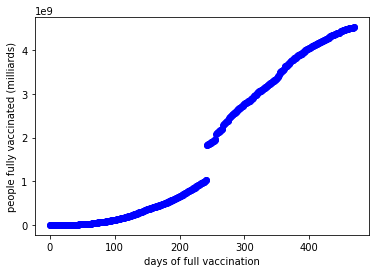

In [91]:
plt.scatter(df_world2_ml.date_delta, df_world2_ml.people_fully_vaccinated, color='blue')
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated (milliards)")
plt.show()

From this diagram, it is clear that other non-linear funtions (exponential, logarithmic, etc.) cannot be used for approximation.

On the other hand, for the models for vaccination (with one dose of vaccine), the results are following:

In [92]:
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the linear model vaccination will be completed in 45 days
According to the quadratic model vaccination will be completed in 133 days
According to the 5-degree model vaccination will be completed in 74 days


Since most vaccines require two doses (and some require only one dose) and the interval between the two doses usually should be 14, 21, or 28 days, it can be concluded that the full vaccination should be completed about 28 days after the vaccination with one dose of vaccine.